# Scalper's Statistics:  PlayStation 5
### By Lee Thomas, Taylor Johnson, Alex Peña, and Paul Leonard
#### December 2020

##### Import related libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Import data sets

In [2]:
df_ebay = pd.read_csv("./data/fake_ps5_ebay.csv")
df_msrp = pd.read_csv("./data/fake_ps5_msrp.csv")

In [3]:
df_ebay.head(5)
df_msrp.head(5)

,date,price
0,1/1/2019,400
1,1/2/2019,400
2,1/3/2019,400
3,1/4/2019,400
4,1/5/2019,400


##### Combine datafames

In [4]:
# consider combining each of the dataframes into one large one called df_ps5
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

# dfs_to_combine = [df_ebay,df_msrp]
# df_combo = pd.concat(dfs_to_combine)
# df_combo.head(5)

df_combo = df_msrp
df_combo["ebay"] = df_ebay["price"]
df_combo["price_delta"] = df_combo.ebay - df_combo.price
df_combo["percent_markup"] = (df_combo.ebay / df_combo.price * 100 - 100).round(2)
df_combo.head(5)


,date,price,ebay,price_delta,percent_markup
0,1/1/2019,400,400,0,0.00
1,1/2/2019,400,425,25,6.25
2,1/3/2019,400,450,50,12.50
3,1/4/2019,400,475,75,18.75
4,1/5/2019,400,500,100,25.00


### Time History Plot of PS5 Prices

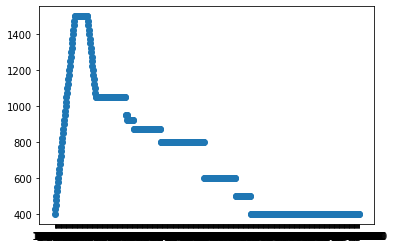

In [5]:
# dates = df_ebay["date"].values
# ebay_price = df_ebay["price"].values
# plt.scatter(dates,ebay_price)

plt.scatter(df_ebay["date"].values,df_ebay["price"].values)
plt.show()


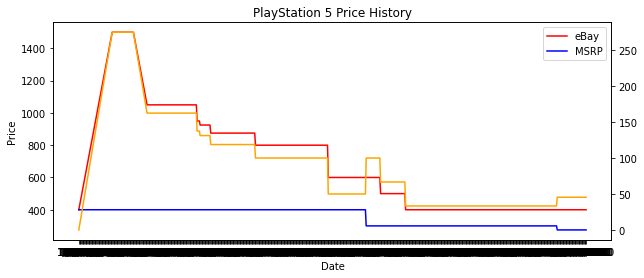

In [6]:
fig, ax = plt.subplots(figsize=(10,4))
sns.lineplot(x = df_ebay["date"].values,
    y = df_ebay["price"].values,
    color = 'r',
    ax = ax)
sns.lineplot(x = df_msrp["date"].values,
    y = df_msrp["price"].values,
    color = 'b',
    ax = ax)
ax2 = ax.twinx()
sns.lineplot(x = df_combo["date"].values,
    y = df_combo["percent_markup"].values,
    color = "orange",
    ax = ax2)
ax.legend(['eBay','MSRP','% markup'], facecolor='w')
# ax2.legend(['% markup'], facecolor='w')
# ax2.set(ylim(0,500))
ax.set(xlabel="Date",ylabel="Price")
# ax.right_ax.set_ylabel('% Markup')
plt.title("PlayStation 5 Price History")
plt.show()


### Line Plots of the PS5 MSRP and Secondary Market with Sony Units Sold Count as Bar Chart

Search the linked site for "Or, we can combine a bar chart and a line chart with the same x-axis but different y-axis:" to get more information on how to make it.  The site is already listed in the README.

https://towardsdatascience.com/a-step-by-step-guide-for-creating-advanced-python-data-visualizations-with-seaborn-matplotlib-1579d6a1a7d0

### Violin Chart for each day PS5 has been released... grouping by day, height by max to min price, width of units sold on ebay